# **Artificial Neural Network**

In [1]:
#Installing important libraries
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,Activation
from keras.layers import Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df3=pd.read_csv("/content/drive/MyDrive/df3_final.csv")  #Importing data from google drive
df3.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Pixel_0,Pixel_1,Pixel_2,...,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,187,148,190,...,154,132,178,167,150,183,177,153,185,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,23,...,43,26,42,27,14,24,28,15,25,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,146,133,186,...,143,128,160,139,117,151,116,105,134,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,27,16,31,...,22,16,29,16,12,26,16,12,24,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,134,110,153,...,179,161,202,132,122,158,84,69,101,2


In [5]:
X = df3.iloc[:,7:3079].values
y = df3.iloc[:, 3079].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
np.random.seed(3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 30)

# **Single-Layer Neural Network**

In [12]:
# Initialising the Single Layer Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(100 ,input_dim = X_train.shape[1]))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(100))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(7, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 128,epochs=50)
print(model_history.history.keys())


Epoch 1/50
51/51 [==============================] - 2s 18ms/step - loss: 1.4098 - accuracy: 0.5934 - val_loss: 0.9319 - val_accuracy: 0.6744
Epoch 2/50
51/51 [==============================] - 1s 16ms/step - loss: 1.0592 - accuracy: 0.6542 - val_loss: 0.8826 - val_accuracy: 0.6831
Epoch 3/50
51/51 [==============================] - 1s 13ms/step - loss: 1.0053 - accuracy: 0.6603 - val_loss: 0.9109 - val_accuracy: 0.6712
Epoch 4/50
51/51 [==============================] - 1s 16ms/step - loss: 0.9267 - accuracy: 0.6778 - val_loss: 0.8555 - val_accuracy: 0.6744
Epoch 5/50
51/51 [==============================] - 1s 18ms/step - loss: 0.8915 - accuracy: 0.6868 - val_loss: 0.8418 - val_accuracy: 0.6719
Epoch 6/50
51/51 [==============================] - 1s 17ms/step - loss: 0.8699 - accuracy: 0.6898 - val_loss: 0.8407 - val_accuracy: 0.6900
Epoch 7/50
51/51 [==============================] - 1s 14ms/step - loss: 0.8404 - accuracy: 0.6985 - val_loss: 0.8279 - val_accuracy: 0.6787
Epoch 8/50
51

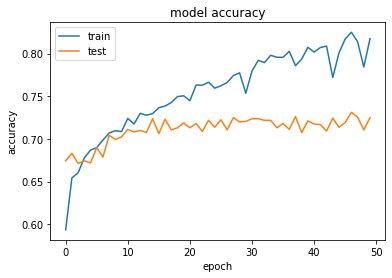

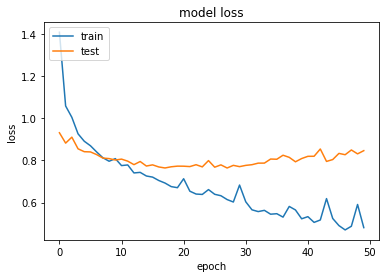

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
pred = list()
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
  test.append(y_test[i])

In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 72.6410384423365


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(test, pred)
cm

array([[  17,   18,    8,    0,    6,   15,    1],
       [  13,   45,    8,    1,    1,   38,    5],
       [   4,   15,   71,    0,   21,  101,    0],
       [   5,   10,    3,    0,    1,    5,    0],
       [   2,   11,   29,    0,   46,  137,    0],
       [   2,    7,   34,    0,   31, 1265,    0],
       [   0,    4,    0,    0,    0,   12,   11]])

In [18]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.40      0.26      0.31        65
           1       0.41      0.41      0.41       111
           2       0.46      0.33      0.39       212
           3       0.00      0.00      0.00        24
           4       0.43      0.20      0.28       225
           5       0.80      0.94      0.87      1339
           6       0.65      0.41      0.50        27

    accuracy                           0.73      2003
   macro avg       0.45      0.37      0.39      2003
weighted avg       0.68      0.73      0.69      2003



# **Fully Connected Neural Network**

In [19]:
classifier1 = Sequential()
# Adding the input layer and the second hidden layer
classifier1.add(Dense(100 ,input_dim = X_train.shape[1]))
classifier1.add(Activation('relu'))
classifier1.add(Dense(100))
classifier1.add(Activation('relu'))
classifier1.add(Dropout(0.3))
classifier1.add(Dense(100))
classifier1.add(Activation('relu'))
classifier1.add(Dropout(0.3))
classifier1.add(Dense(7, activation = 'softmax'))
classifier1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model1_history=classifier1.fit(X_train, y_train,validation_split=0.20,batch_size = 128,epochs = 50)
print(model1_history.history.keys())

Epoch 1/50
51/51 [==============================] - 3s 21ms/step - loss: 1.1368 - accuracy: 0.6276 - val_loss: 0.9382 - val_accuracy: 0.6706
Epoch 2/50
51/51 [==============================] - 1s 16ms/step - loss: 0.9609 - accuracy: 0.6664 - val_loss: 0.8869 - val_accuracy: 0.6825
Epoch 3/50
51/51 [==============================] - 1s 14ms/step - loss: 0.9397 - accuracy: 0.6792 - val_loss: 0.8699 - val_accuracy: 0.6818
Epoch 4/50
51/51 [==============================] - 1s 15ms/step - loss: 0.8978 - accuracy: 0.6872 - val_loss: 0.8459 - val_accuracy: 0.6937
Epoch 5/50
51/51 [==============================] - 1s 14ms/step - loss: 0.8844 - accuracy: 0.6883 - val_loss: 0.8536 - val_accuracy: 0.6850
Epoch 6/50
51/51 [==============================] - 1s 15ms/step - loss: 0.8488 - accuracy: 0.6953 - val_loss: 0.8289 - val_accuracy: 0.6906
Epoch 7/50
51/51 [==============================] - 1s 22ms/step - loss: 0.8098 - accuracy: 0.7154 - val_loss: 0.8277 - val_accuracy: 0.6881
Epoch 8/50
51

In [20]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)
pred1 = list()
for i in range(len(y_pred1)):
  pred1.append(np.argmax(y_pred1[i]))
#Converting one hot encoded test label to label
test1 = list()
for i in range(len(y_test)):
  test1.append(y_test[i])

In [21]:
a1= accuracy_score(pred1,test1)
print('Accuracy is:', a1*100)

Accuracy is: 71.09335996005991


In [22]:
# Making the Confusion Matrix
cm1= confusion_matrix(test1, pred1)
cm1

array([[  21,   14,    9,    0,    6,   13,    2],
       [  16,   29,   17,    2,    4,   38,    5],
       [   8,    6,   79,    1,   23,   91,    4],
       [   3,    6,    9,    0,    0,    6,    0],
       [   1,    7,   37,    0,   58,  121,    1],
       [   4,    4,   55,    0,   45, 1230,    1],
       [   0,    6,    2,    0,    0,   12,    7]])

In [23]:
print(classification_report(test1, pred1))

              precision    recall  f1-score   support

           0       0.40      0.32      0.36        65
           1       0.40      0.26      0.32       111
           2       0.38      0.37      0.38       212
           3       0.00      0.00      0.00        24
           4       0.43      0.26      0.32       225
           5       0.81      0.92      0.86      1339
           6       0.35      0.26      0.30        27

    accuracy                           0.71      2003
   macro avg       0.40      0.34      0.36      2003
weighted avg       0.67      0.71      0.69      2003



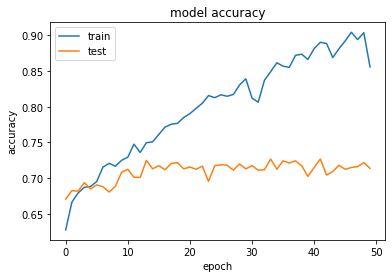

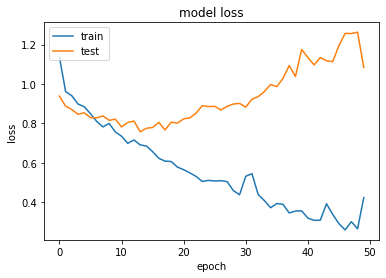

In [24]:
# summarize history for accuracy
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
classifier2 = Sequential()
# Adding the input layer and the three hidden layer
classifier2.add(Dense(100 ,input_dim = X_train.shape[1]))
classifier2.add(Activation('relu'))
classifier2.add(Dropout(0.3))
classifier2.add(Dense(100))
classifier2.add(Activation('relu'))
classifier2.add(Dropout(0.3))
classifier2.add(Dense(100))
classifier2.add(Activation('relu'))
classifier2.add(Dropout(0.3))
classifier2.add(Dense(100))
classifier2.add(Activation('relu'))
classifier2.add(Dropout(0.3))
classifier2.add(Dense(7, activation = 'softmax'))
classifier2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2_history=classifier2.fit(X_train, y_train,validation_split=0.33,batch_size = 128, epochs = 50)
print(model2_history.history.keys())

Epoch 1/50
42/42 [==============================] - 2s 24ms/step - loss: 1.3359 - accuracy: 0.5779 - val_loss: 0.9563 - val_accuracy: 0.6710
Epoch 2/50
42/42 [==============================] - 1s 18ms/step - loss: 1.0709 - accuracy: 0.6475 - val_loss: 0.9444 - val_accuracy: 0.6759
Epoch 3/50
42/42 [==============================] - 1s 16ms/step - loss: 1.0150 - accuracy: 0.6529 - val_loss: 0.9509 - val_accuracy: 0.6755
Epoch 4/50
42/42 [==============================] - 1s 17ms/step - loss: 0.9869 - accuracy: 0.6591 - val_loss: 0.9148 - val_accuracy: 0.6732
Epoch 5/50
42/42 [==============================] - 0s 11ms/step - loss: 0.9712 - accuracy: 0.6647 - val_loss: 0.9123 - val_accuracy: 0.6789
Epoch 6/50
42/42 [==============================] - 0s 11ms/step - loss: 0.9662 - accuracy: 0.6630 - val_loss: 0.9006 - val_accuracy: 0.6725
Epoch 7/50
42/42 [==============================] - 0s 11ms/step - loss: 0.9354 - accuracy: 0.6677 - val_loss: 0.8907 - val_accuracy: 0.6797
Epoch 8/50
42

In [26]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
pred2 = list()
for i in range(len(y_pred2)):
  pred2.append(np.argmax(y_pred2[i]))
#Converting one hot encoded test label to label
test2 = list()
for i in range(len(y_test)):
  test2.append(y_test[i])

In [27]:
a2 = accuracy_score(pred2,test2)
print('Accuracy is:', a2*100)

Accuracy is: 72.24163754368448


In [28]:
# Making the Confusion Matrix
cm2= confusion_matrix(test2, pred2)
cm2

array([[  22,   23,    5,    0,    6,    9,    0],
       [  13,   49,   17,    0,    0,   31,    1],
       [   8,   17,   75,    0,   14,   98,    0],
       [   0,   13,    5,    0,    1,    5,    0],
       [   1,   10,   38,    0,   31,  145,    0],
       [   6,    9,   48,    0,    9, 1267,    0],
       [   2,    8,    1,    0,    0,   13,    3]])

In [29]:
print(classification_report(test2, pred2))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        65
           1       0.38      0.44      0.41       111
           2       0.40      0.35      0.37       212
           3       0.00      0.00      0.00        24
           4       0.51      0.14      0.22       225
           5       0.81      0.95      0.87      1339
           6       0.75      0.11      0.19        27

    accuracy                           0.72      2003
   macro avg       0.47      0.33      0.35      2003
weighted avg       0.68      0.72      0.68      2003



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


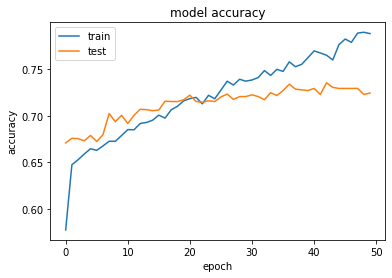

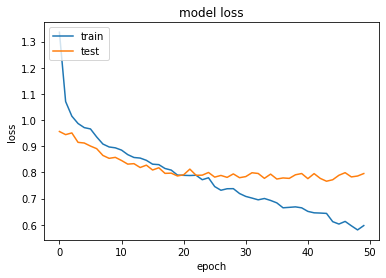

In [30]:
# summarize history for accuracy
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
classifier3 = Sequential()
# Adding the input layer and the three hidden layer
classifier3.add(Dense(100 ,input_dim = X_train.shape[1]))
classifier3.add(Activation('relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Dense(100))
classifier3.add(Activation('relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Dense(100))
classifier3.add(Activation('relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Dense(100))
classifier3.add(Activation('relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Dense(100))
classifier3.add(Activation('relu'))
classifier3.add(Dropout(0.3))
classifier3.add(Dense(7, activation = 'softmax'))
classifier3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model3_history=classifier3.fit(X_train, y_train,validation_split=0.33,batch_size = 128,epochs = 50)
print(model3_history.history.keys())

Epoch 1/50
42/42 [==============================] - 2s 26ms/step - loss: 1.2589 - accuracy: 0.6034 - val_loss: 1.0712 - val_accuracy: 0.6638
Epoch 2/50
42/42 [==============================] - 1s 17ms/step - loss: 1.0598 - accuracy: 0.6522 - val_loss: 1.0276 - val_accuracy: 0.6683
Epoch 3/50
42/42 [==============================] - 1s 19ms/step - loss: 1.0187 - accuracy: 0.6621 - val_loss: 0.9870 - val_accuracy: 0.6694
Epoch 4/50
42/42 [==============================] - 1s 19ms/step - loss: 0.9967 - accuracy: 0.6623 - val_loss: 0.9463 - val_accuracy: 0.6762
Epoch 5/50
42/42 [==============================] - 1s 16ms/step - loss: 0.9801 - accuracy: 0.6606 - val_loss: 0.9431 - val_accuracy: 0.6698
Epoch 6/50
42/42 [==============================] - 1s 13ms/step - loss: 0.9789 - accuracy: 0.6637 - val_loss: 0.9682 - val_accuracy: 0.6694
Epoch 7/50
42/42 [==============================] - 1s 12ms/step - loss: 0.9503 - accuracy: 0.6688 - val_loss: 0.9232 - val_accuracy: 0.6725
Epoch 8/50
42

In [32]:
# Predicting the Test set results
y_pred3 = classifier2.predict(X_test)
pred3 = list()
for i in range(len(y_pred3)):
  pred3.append(np.argmax(y_pred3[i]))
#Converting one hot encoded test label to label
test3 = list()
for i in range(len(y_test)):
  test3.append(y_test[i])

In [33]:
a3 = accuracy_score(pred3,test3)
print('Accuracy is:', a3*100)

Accuracy is: 72.24163754368448


In [34]:
# Making the Confusion Matrix
cm3= confusion_matrix(test3, pred3)
cm3


array([[  22,   23,    5,    0,    6,    9,    0],
       [  13,   49,   17,    0,    0,   31,    1],
       [   8,   17,   75,    0,   14,   98,    0],
       [   0,   13,    5,    0,    1,    5,    0],
       [   1,   10,   38,    0,   31,  145,    0],
       [   6,    9,   48,    0,    9, 1267,    0],
       [   2,    8,    1,    0,    0,   13,    3]])

In [35]:
print(classification_report(test3, pred3))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        65
           1       0.38      0.44      0.41       111
           2       0.40      0.35      0.37       212
           3       0.00      0.00      0.00        24
           4       0.51      0.14      0.22       225
           5       0.81      0.95      0.87      1339
           6       0.75      0.11      0.19        27

    accuracy                           0.72      2003
   macro avg       0.47      0.33      0.35      2003
weighted avg       0.68      0.72      0.68      2003



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
